In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display

# Generate cycles to be tested

In [2]:
def generate_cycles(length):
    return [list(range(1, length)) + [n] for n in range(1, length)]

generate_cycles(10)

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 1],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 2],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 3],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 4],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 5],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 6],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 7],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 8],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 9]]

# Algorithm 1: Search and collect the visited address

In [3]:
def cycle_detection_by_indexing(cycle):
    from_nodes = cycle[:-1]
    to_nodes = cycle[1:]
    sequence = dict(zip(from_nodes, to_nodes))
    
    current_node = 1
    visited_nodes = [1]
    steps = 1
    
    while len(visited_nodes) <= len(cycle):
        next_node = sequence[current_node]
        
        if next_node in visited_nodes:
            return {
                "steps": steps,
                "cycle_start": next_node
            }
        
        current_node = next_node
        visited_nodes.append(current_node)
        steps += 1
    
    return {
        "steps": steps,
        "cycle_start": None
    }

cycle_detection_by_indexing([1, 2, 3, 4, 5, 6, 7, 8, 9, 5])

{'cycle_start': 5, 'steps': 9}

# Algorithm 2: Search by one slow and one fast pointer (2x speed)
Require to reset pointers and perform second search to locate the cycle start position.

In [4]:
def cycle_detection_by_slow_fast_pointers(cycle):
    from_nodes = cycle[:-1]
    to_nodes = cycle[1:]
    sequence = dict(zip(from_nodes, to_nodes))
    
    current_node_slow = 1
    current_node_fast = 1
    steps = 1
    
    while True:
        next_node_slow = sequence[current_node_slow]
        next_node_fast = sequence[sequence[current_node_fast]] #One more step

        if next_node_slow == next_node_fast:
            # Found cycle, now look for the key node
            # Forget all the pointers
            # Create 1 pointer, start from node 1
            # Create another point, start from current found node
            
            current_node1 = 1
            current_node2 = next_node_slow
            
            while current_node1 != current_node2:
                current_node1 = sequence[current_node1]
                current_node2 = sequence[current_node2]
                steps += 1
            
            return {
                "steps": steps,
                "cycle_start": current_node1
            }

        current_node_slow = next_node_slow
        current_node_fast = next_node_fast
        steps += 1
    
    return {
        "steps": steps,
        "cycle_start": None
    }

cycle_detection_by_indexing([1, 2, 3, 4, 5, 6, 7, 8, 9, 5])

{'cycle_start': 5, 'steps': 9}

# Simulation

,01_cycle_start,01_steps,02_cycle_start,02_steps
cycle,,,,
"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 1]",1,29,1,29
"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 2]",2,29,2,29
"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3]",3,29,3,29
"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 4]",4,29,4,29
"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 5]",5,29,5,29
"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 6]",6,29,6,29
"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 7]",7,29,7,29
"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 8]",8,29,8,29
"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 9]",9,29,9,29


C:\Users\ChiaWei\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


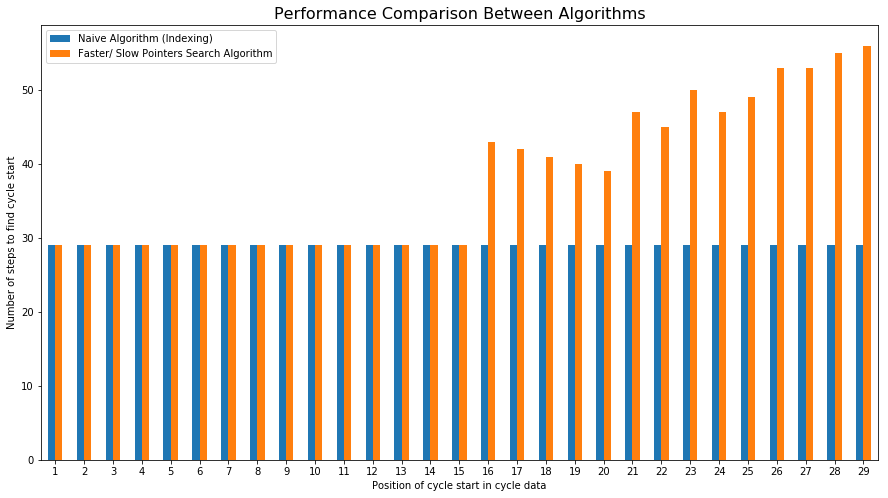

In [5]:
def simulate(cycle_length):
    cycles = generate_cycles(cycle_length)
    results1 = [cycle_detection_by_indexing(c) for c in cycles]
    results2 = [cycle_detection_by_slow_fast_pointers(c) for c in cycles]

    df = pd.DataFrame({
        'cycle': cycles,
        '01_steps': [r['steps'] for r in results1],
        '01_cycle_start': [r['cycle_start'] for r in results1],
        '02_steps': [r['steps'] for r in results2],
        '02_cycle_start': [r['cycle_start'] for r in results2],
    })
    df = df.set_index(['cycle'], drop=True)
    display(df)
    
    fig, ax = plt.subplots(figsize=(15, 8))

    df.plot.bar(ax=ax, y=['01_steps', '02_steps'], rot=0)
    legend = plt.legend()
    legend.get_texts()[0].set_text('Naive Algorithm (Indexing)')
    legend.get_texts()[1].set_text('Faster/ Slow Pointers Search Algorithm')
    ax.set_title('Performance Comparison Between Algorithms', fontsize=16)
    ax.set_xticklabels(range(1, df.shape[0] + 1))
    ax.set_ylabel('Number of steps to find cycle start')
    ax.set_xlabel('Position of cycle start in cycle data')

    plt.show()
    
simulate(30)

Considering number of steps to locate the cycle start position, algorithm 1 outperforms the another

# More Visualizations

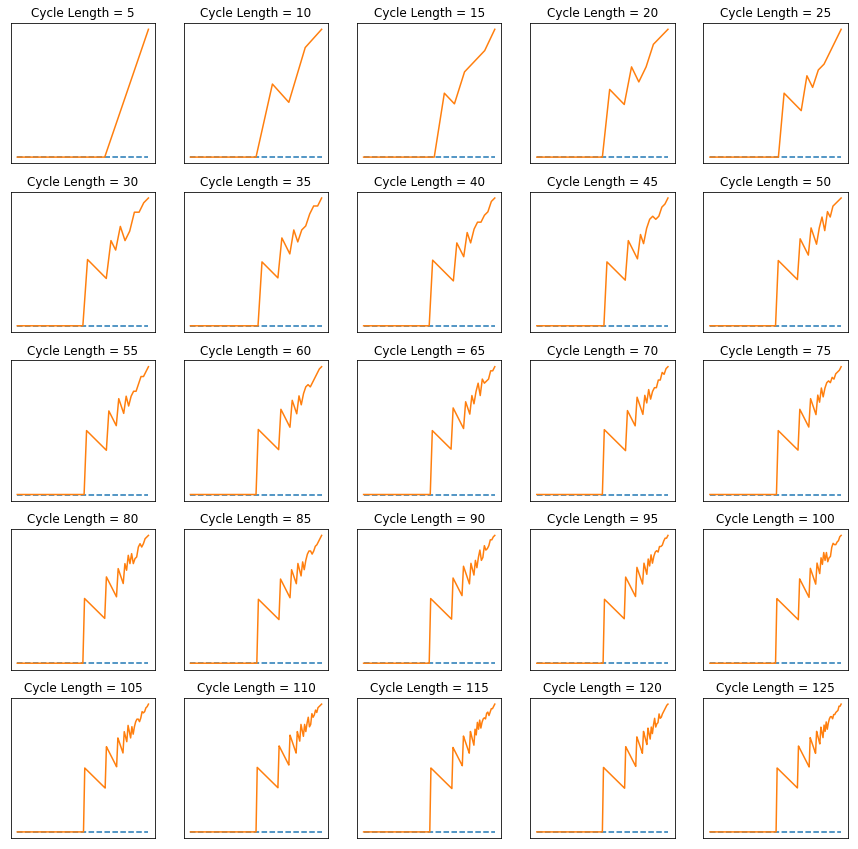

In [6]:
def simulation_subgraphs(start, diff, nrows, ncols):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 3))
    cycle_lengths = np.arange(start, start + diff * nrows * ncols, diff)

    for index, ax in enumerate(axes.flatten()):

        cycle_length = cycle_lengths[index]
        cycles = generate_cycles(cycle_length)
        results1 = [cycle_detection_by_indexing(c) for c in cycles]
        results2 = [cycle_detection_by_slow_fast_pointers(c) for c in cycles]

        df = pd.DataFrame({
            'cycle': cycles,
            '01_steps': [r['steps'] for r in results1],
            '01_cycle_start': [r['cycle_start'] for r in results1],
            '02_steps': [r['steps'] for r in results2],
            '02_cycle_start': [r['cycle_start'] for r in results2],
        })
        df = df.set_index(['cycle'], drop=True)

        df.plot(ax=ax, y='01_steps', rot=0, linestyle='--', legend=None) #This is baseline
        df.plot(ax=ax, y='02_steps', rot=0, linestyle='-', legend=None)

        ax.set_title('Cycle Length = {}'.format(cycle_length))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

simulation_subgraphs(start=5, diff=5, nrows=5, ncols=5)